aspose.slides という手も

In [800]:
import pptx
from pptx import Presentation
from pptx.util import Inches, Cm, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor
from pptx.enum.text import MSO_ANCHOR
from bs4 import BeautifulSoup
import importlib
import numpy as np
import os
import zipfile
import shutil
import re
from PIL import Image

In [814]:
import script_zip
import script_pptx
importlib.reload(script_pptx)
importlib.reload(script_zip)

<module 'script_zip' from '/Users/mac/Documents/VScode/Python/tk_exe/script_zip.py'>

### スライド作成

In [807]:
# 新規pptxファイル生成
prs_new = Presentation()
prs_new.slides.add_slide(prs_new.slide_layouts[0])
prs_new.save('new.pptx')

### スライドマスター レイアウト編集

In [808]:
# 新規pptxファイル生成
prs_new = Presentation()

# ファイル名
filepath = 'new.pptx'

#スライドのサイズを指定
prs_new.slide_width = Cm(27.52)
prs_new.slide_height = Cm(19.05)
prs_new.save(filepath)

# スライドマスター数の調整 (削除)
script_pptx.delete_layouts(filepath, [5, 6, 7, 8, 9, 10, 11], master_num = 1)

# xmlの入れ替え
replace_dict = {
    'ppt/slideMasters/slideMaster1.xml': 'xml/slideMaster1.xml',
    'ppt/tableStyles.xml': 'xml/tableStyles.xml',
    'ppt/viewProps.xml': 'xml/viewProps.xml',
}
for i in range(1, 5):
    key = 'ppt/slideLayouts/slideLayout'+str(i)+'.xml'
    value = 'xml/slideLayout'+str(i)+'.xml'
    replace_dict.setdefault(key, value)

script_pptx.replace_xml(filepath, replace_dict)

# カラーパレット設定
color_dict = {
    'dk1': None,
    'lt1': None,
    'dk2': 'BF940A',
    'lt2': '1D2A74',
    'accent1': 'FA6D02',
    'accent2': '1D73B7',
    'accent3': '55B06E',
    'accent4': 'FF0000',
    'accent5': '1d2087',
    'accent6': '3E9565',
}
script_pptx.change_color_palette(filepath, color_dict, master_num = 1, theme_num = 1)

### タイトル追加

In [809]:
prs = Presentation(filepath)
slide_layout = prs.slide_layouts[2]
slide = prs.slides.add_slide(slide_layout)

# スライド内の個別PlaceFoldeオブジェクトを展開
slides = [p for p in slide.placeholders]

# タイトル
title = slides[0]
title_text = 'title'
title.text = title_text

# サブタイトル
body = slides[1]

# パラグラフ追記
tf = body.text_frame
body_text = 'text2'
script_pptx.add_text(tf.paragraphs[0], body_text, size = 14, bold = True, level = 0)

prs.save(filepath)

### スライド追加

In [810]:
def normal_slide(filepath):
    title_text = 'Title'

    prs = Presentation(filepath)
    slide_layout = prs.slide_layouts[0]
    slide = prs.slides.add_slide(slide_layout)

    # スライド内の個別PlaceFoldeオブジェクトを展開
    slides = [p for p in slide.placeholders]

    # タイトル
    title = slides[0]
    title.text = title_text

    # サブタイトル
    body = slides[1]

    # パラグラフ追記
    tf = body.text_frame

    body_text = 'text2'
    script_pptx.add_text(tf.paragraphs[0], body_text, size = 14, bold = True, level = 0)

    body_text = 'aaaaa'
    script_pptx.add_text(tf.add_paragraph(), body_text, size = 14, bold = False, level = 1, alignment = 'CENTER')

    body_text = 'bbbb'
    script_pptx.add_text(tf.add_paragraph(), body_text, size = 14, bold = False, level = 1)
    
    body_text = 'text3'
    script_pptx.add_text(tf.add_paragraph(), body_text, size = 14, bold = True, level = 0)

    body_text = 'aaaaa'
    script_pptx.add_text(tf.add_paragraph(), body_text, size = 14, bold = False, level = 1)

    body_text = 'bbbb'
    script_pptx.add_text(tf.add_paragraph(), body_text, size = 14, bold = False, level = 1)
    
    prs.save(filepath)

In [ ]:
normal_slide(filepath)

### グラフ追加

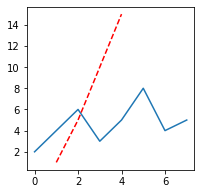

In [811]:
import matplotlib.pyplot as plt
data = [2, 4, 6, 3, 5, 8, 4, 5]

fig, ax = plt.subplots(figsize = (3, 3))
ax.plot(data)
ax.plot([1,2,3,4],[1,5,10,15],"r--")
plt.savefig('graph.png')
plt.show()

In [812]:
filepath = 'new.pptx'
prs = Presentation(filepath)
prs.slide_layouts

# 画像追加
slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(slide_layout)
img_path = 'graph.png'
w, h = script_pptx.get_img_size(img_path)
script_pptx.add_img(slide, img_path, Cm(1), Cm(2), Pt(w), Pt(h))

prs.save(filepath)

### Tableレイアウト

In [815]:
# 入力したいtable状のデータ
sample_table = [ ["1.1","1.2","1.3"]
                ,["2.1","2.2","2.3"]
                ,["3.1","3.2","3.3"]]

# cell内のフォントサイズ
font_size = 12

# 挿入する位置
table_left = Cm(5)
table_top = Cm(15)

# tableの幅と高さ（仮）
table_width = Cm(3*len(sample_table[0]))
table_height = Cm(1*len(sample_table))

prs = Presentation(filepath)
slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(slide_layout)
script_pptx.add_table(slide, sample_table, table_left, table_top, table_width, table_height, font_size)
prs.save(filepath)

In [143]:
import tempfile
def remove_file(zipname, filename):
    # generate a temp file
    dir_path = os.path.dirname('')
    tmpfd, tmpname = tempfile.mkstemp(dir = dir_path)
    os.close(tmpfd)

    # create a temp copy of the archive without filename            
    with zipfile.ZipFile(zipname, 'r') as zin:
        with zipfile.ZipFile(tmpname, 'w') as zout:
            zout.comment = zin.comment # preserve the comment
            for item in zin.infolist():
                if item.filename != filename:
                    zout.writestr(item, zin.read(item.filename))
    # replace with the temp archive
    os.remove(zipname)
    os.rename(tmpname, zipname)

def rename_file(zipname, filename):
    # generate a temp file
    dir_path = os.path.dirname('')
    tmpfd, tmpname = tempfile.mkstemp(dir = dir_path)
    os.close(tmpfd)

    # create a temp copy of the archive without filename            
    with zipfile.ZipFile(zipname, 'r') as zin:
        with zipfile.ZipFile(tmpname, 'w') as zout:
            zout.comment = zin.comment # preserve the comment
            for item in zin.infolist():
                if item.filename != filename:
                    zout.writestr(item, zin.read(item.filename))

    # replace with the temp archive
    os.remove(zipname)
    os.rename(tmpname, zipname)